# BAGLE Calculator


In [28]:
%matplotlib widget
import ipywidgets as widgets
from IPython.display import clear_output

import sys
sys.path.append('src/')
from src.bagle import model

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [29]:
ipython = get_ipython()

def hide_traceback(exc_tuple=None, filename=None, tb_offset=None,
                   exception_only=False, running_compiled_code=False):
    etype, value, tb = sys.exc_info()
    return ipython._showtraceback(etype, value, ipython.InteractiveTB.get_exception_only(etype, value))

ipython.showtraceback = hide_traceback

In [30]:
mL = 10.0  # msun
t0 = 57000.00
xS0 = np.array([0.000, 0.000])
# beta = -0.4 # mas
beta = 1.4  # mas
muS = np.array([8.0, 0.0])
# muL = np.array([-7.0, 0.00])
muL = np.array([0.00, 0.00])
dL = 4000.0
dS = 8000.0
b_sff = 1.0
mag_src = 19.0

event1 = model.PSPL_PhotAstrom_noPar_Param1(mL,t0,beta,dL,dL / dS,xS0[0],xS0[1],muL[0],muL[1],muS[0],muS[1],[b_sff],[mag_src])

In [31]:
event1_phot = model.PSPL_Phot_noPar_Param1(t0, event1.u0_amp, event1.tE, event1.piE_E, event1.piE_N,[b_sff],[mag_src])

Dropdown(description='Model:', index=1, options=('', 'PSPL_PhotAstrom_noPar_Param1', 'PSPL_Phot_noPar_Param1')…

PSPL_PhotAstromParam1


Output()

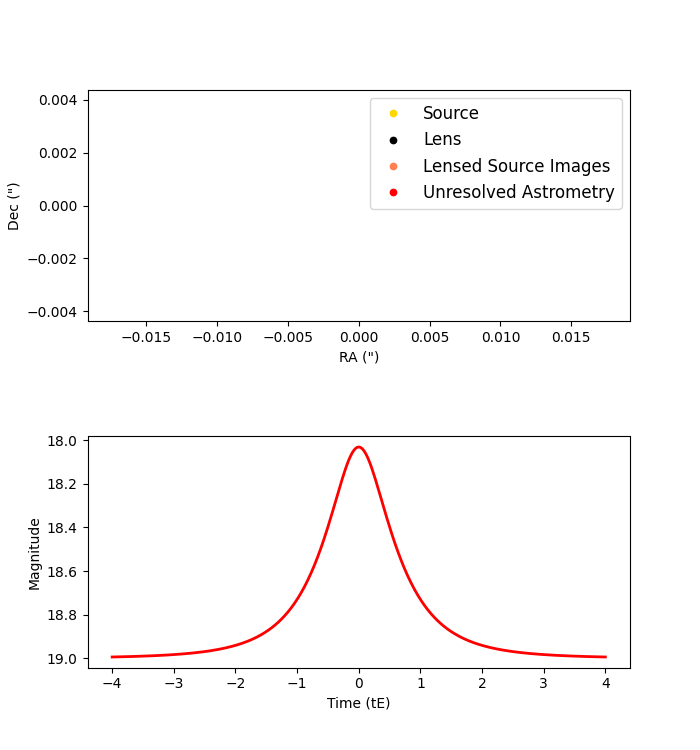

In [33]:
model_map = {'PSPL_PhotAstrom_noPar_Param1': (event1, [7,7]), 'PSPL_Phot_noPar_Param1': (event1_phot,[8,4])}

select_variable = widgets.Dropdown(
    options=['','PSPL_PhotAstrom_noPar_Param1','PSPL_Phot_noPar_Param1'],
    value='',
    description='Model:',
)

def get_and_plot(event):
    if event['new'] != '':
        clear_output()
        display(select_variable)
        interact_model, figsize = model_map[event['new']]
        interact_model.interact(4, 150, figsize, 3)

display(select_variable)
select_variable.observe(get_and_plot,names='value')